<a href="https://colab.research.google.com/github/aser-tesfaye/Image_Classification_with_CNN/blob/main/Image_classification_with_cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170498071/170498071 [==============================] - 4s 0us/step


(50000, 32, 32, 3)

In [3]:
X_test.shape

(10000, 32, 32, 3)

In [4]:
y_train.shape

(50000, 1)

#### # Display the labels of the first five images in the training set

In [5]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [6]:
# Flatten the train labels array to a 1D array
y_train = y_train.reshape(-1,)

# Display the first five labels
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [7]:
# Flatten the test labels array to a 1D array
y_test = y_test.reshape(-1,)

In [8]:
# Define the class labels
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [9]:
# function to plot a sample image and its label

def plot_sample(X, y, index):

    # Set the figure size to (15,2) inches
    plt.figure(figsize = (15,2))

    # Display the image at the specified index
    plt.imshow(X[index])

    # Set the x-label to the corresponding class label
    plt.xlabel(classes[y[index]])

The function `plot_sample` takes three arguments:

`X`: This is your image data.

`y`: This contains the labels for your images.

`index`: This is the index of the specific image you want to plot.

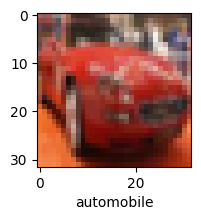

In [10]:
plot_sample(X_train, y_train, 5)

In [11]:
# Normalize pixel values to be between 0 and 1

X_train = X_train / 255.0
X_test = X_test / 255.0

In [12]:
X_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [13]:
# Define the Convolutional Neural Network (CNN) model

cnn = models.Sequential([

    # Convolutional layers

    # First convolutional layer with 64 filters, a 4x4 kernel, ReLU activation, and input shape matching CIFAR-10 images
    layers.Conv2D(filters=32, kernel_size=(2, 2), activation='relu', input_shape=(32, 32, 3)),

    # Max pooling layer with a 2x2 pool size
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer with 128 filters and a 3x3 kernel
    layers.Conv2D(filters=64, kernel_size=(2, 2), activation='relu'),

    # Another max pooling layer
    layers.MaxPooling2D((2, 2)),


    # Dense layers

    # Flatten the output from convolutional layers to feed into dense layers
    layers.Flatten(),

    # Dense layer with 64 units and ReLU activation
    layers.Dense(64, activation='relu'),

    # Output layer with 10 units (for 10 classes) and softmax activation for classification
    layers.Dense(10, activation='softmax')
])

In [14]:
# Compile the CNN model

cnn.compile(optimizer='adam',    #Adam optimizer for updating model weights
              loss='sparse_categorical_crossentropy',      # for multi-class classification with integer labels
              metrics=['accuracy'])     # Tracking the accuracy as a metric during training

####An epoch means training the neural network with all the training data for one cycle

In [15]:
# Train the CNN model

cnn.fit(X_train, y_train, epochs=15)
#An epoch means training the neural network with all the training data for one cycle

Epoch 1/15
1563/1563 [==============================] - 15s 6ms/step - loss: 1.4576 - accuracy: 0.4763
Epoch 2/15
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1267 - accuracy: 0.6046
Epoch 3/15
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9953 - accuracy: 0.6493
Epoch 4/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9220 - accuracy: 0.6796
Epoch 5/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8549 - accuracy: 0.7047
Epoch 6/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.8077 - accuracy: 0.7191
Epoch 7/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7598 - accuracy: 0.7389
Epoch 8/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7148 - accuracy: 0.7518
Epoch 9/15
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6766 - accuracy: 0.7661
Epoch 10/15
1563/1563 [==============================] - 6s 4ms/step - loss: 0.64

In [16]:
# Evaluate the model on the test set

cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.0062 - accuracy: 0.6943


[1.006194829940796, 0.6942999958992004]

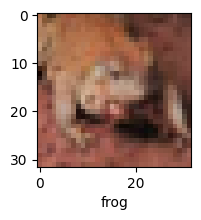

In [17]:
# Display the image at index 5 from the test set along with its label
plot_sample(X_test, y_test,5)

In [18]:
# Generate predictions for the test set
y_pred = cnn.predict(X_test)

# Display the first 5 predictions
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[1.8750761e-04, 2.9822901e-05, 1.7778075e-04, 9.2078525e-01,
        1.1069224e-05, 7.0036247e-02, 6.1615038e-04, 2.4278703e-05,
        8.1116166e-03, 2.0180763e-05],
       [8.6990563e-05, 2.8508911e-02, 1.4532195e-06, 9.3182905e-07,
        7.6861042e-09, 4.1412228e-08, 8.1564178e-07, 1.4381681e-08,
        9.7138143e-01, 1.9418641e-05],
       [8.2480985e-01, 3.4477785e-02, 3.0554426e-03, 1.6809261e-03,
        3.0783920e-03, 4.7857302e-05, 1.2214002e-05, 1.8911032e-03,
        1.3054106e-01, 4.0539788e-04],
       [9.7119677e-01, 1.0979920e-02, 4.7427076e-03, 7.2146265e-04,
        2.0076602e-03, 1.6198633e-06, 1.3280217e-06, 1.0183559e-04,
        1.0106724e-02, 1.4003423e-04],
       [7.7363635e-09, 1.0697738e-08, 1.0060398e-03, 4.3837936e-04,
        3.7846752e-02, 1.0296710e-04, 9.6060508e-01, 8.4832003e-08,
        4.5384462e-07, 7.8188172e-08]], dtype=float32)

In [26]:
# Extract the predicted class labels from the predicted probabilities
y_classes = [np.argmax(element) for element in y_pred]

# Display the first 5 predicted class labels
y_classes[:5]

[3, 8, 0, 0, 6]

In [20]:
y_test[:15]

array([3, 8, 8, 0, 6, 6, 1, 6, 3, 1, 0, 9, 5, 7, 9], dtype=uint8)

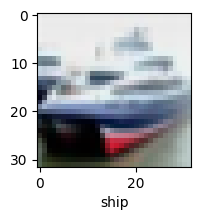

In [21]:
plot_sample(X_test, y_test,1)

Epoch 1/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4565 - accuracy: 0.8397 - val_loss: 1.0221 - val_accuracy: 0.6985
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.4285 - accuracy: 0.8491 - val_loss: 1.0415 - val_accuracy: 0.7041
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.4018 - accuracy: 0.8574 - val_loss: 1.1055 - val_accuracy: 0.6911
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.3826 - accuracy: 0.8664 - val_loss: 1.1339 - val_accuracy: 0.6898
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3548 - accuracy: 0.8742 - val_loss: 1.1789 - val_accuracy: 0.6866
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3373 - accuracy: 0.8798 - val_loss: 1.2473 - val_accuracy: 0.6838
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.3105 - accuracy: 0.8899 - val_loss: 1.3152 - val_accuracy:

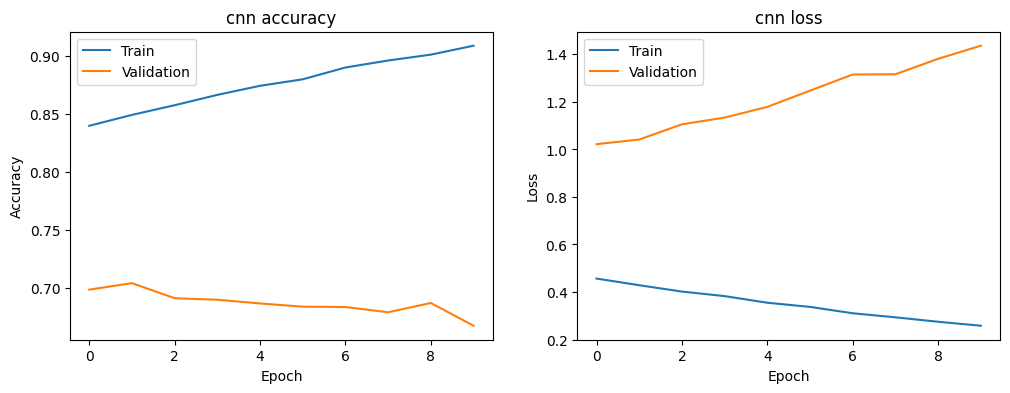

In [27]:
# Assuming 'history' is the output from cnn.fit()
history = cnn.fit(X_train, y_train, epochs=10,
                    validation_data=(X_test, y_test))

# Plotting training & validation accuracy values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('cnn accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plotting training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('cnn loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


In [28]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Print the shape of the training and test images
print(f"Training images shape: {train_images.shape}")
print(f"Test images shape: {test_images.shape}")


Training images shape: (50000, 32, 32, 3)
Test images shape: (10000, 32, 32, 3)


1/1 [==============================] - 0s 52ms/step


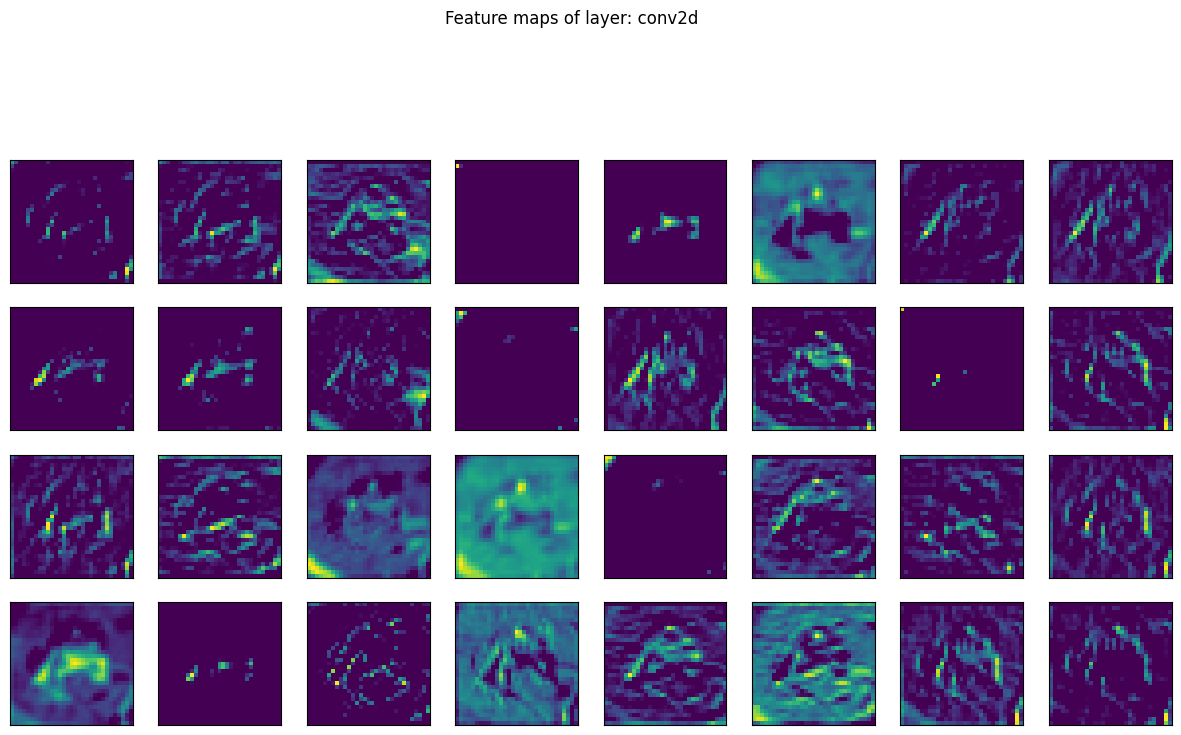

In [31]:
from tensorflow.keras.models import Model

# Get the output of the first convolutional layer
layer_outputs = [layer.output for layer in cnn.layers if 'conv' in layer.name]
activation_model = Model(inputs=cnn.input, outputs=layer_outputs)

# Choose an image to pass through the model
img = train_images[0]
img = np.expand_dims(img, axis=0)

# Get the feature maps
feature_maps = activation_model.predict(img)

# Plot the feature maps for the first convolutional layer
first_layer_activation = feature_maps[0]
layer_name = cnn.layers[0].name

plt.figure(figsize=(15, 15))
for i in range(first_layer_activation.shape[-1]):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='viridis')
plt.suptitle(f'Feature maps of layer: {layer_name}')
plt.show()



In [32]:
# Save the entire model to a HDF5 file
cnn.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [43]:
# Load the saved model
loaded_model = tf.keras.models.load_model("my_model.h5")

In [39]:
# Assuming 'X_test' and 'y_test' are your test data and labels
loss, accuracy = loaded_model.evaluate(X_test, y_test)
print("Loss:", loss)
print("Accuracy:", accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 1.4363 - accuracy: 0.6674
Loss: 1.436285138130188
Accuracy: 0.6674000024795532


my_model.h5  sample_data
